In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot   as plt
import seaborn as sns


In [4]:
# importing titanic dataset
data = pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age'>

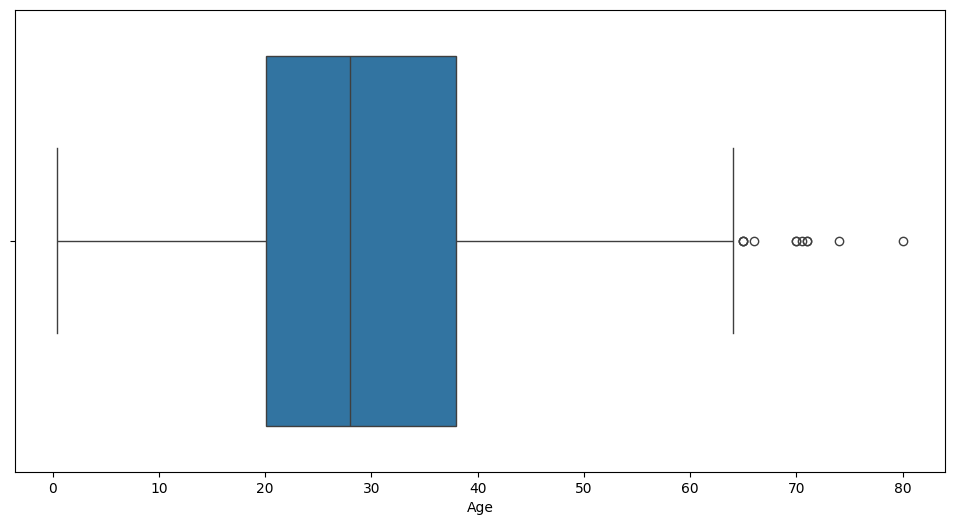

In [7]:
# box plot for age
plt.figure(figsize=(12 ,6))
sns.boxplot(data=data , x = "Age")

In [10]:
# There are defenetely some outliers
outlier = []
data1 = data["Age"]

def detect_outliers(data1):
    # if the z score is greater then 3 or less then -3 then its an outlier
    # z score = datapoint - mean / standard deviation
    z = 3
    mean = np.mean(data1)
    std = np.std(data1)

    print(mean)
    print(std)

    for i in  data1:
        Z_score = (i - mean) / std
        if np.abs(Z_score) > z:
            outlier.append(i)


    return outlier


In [11]:
print(detect_outliers(data1))

29.69911764705882
14.516321150817316
[80.0, 74.0]


In [14]:
# IQR = inter quartile range
# find q1 and q3 and range
# lower fence and higher fence

def outlier_using_IQR(data):
    outliers = []
    np.sort(data)
    #lets find q1 and q3
    q1 = np.percentile(data , 25)
    q3 = np.percentile(data , 75)
    iqr = q3-q1
    lower = q1 - 1.5 * iqr
    higher = q3 + 1.5 * iqr

    for i in data :
        if (i < lower) or (i > higher) :
            outliers.append(i)

    return outliers



In [16]:
data = [10, 20, 30, 40, 50, 100, 200]
outliers = outlier_using_IQR(data)
print("Outliers:", outliers)

Outliers: [200]
